In [1]:
import numpy as np
import pandas as pd

In [4]:
train = pd.read_csv('./data/train.csv', index_col = 'PassengerId')
test = pd.read_csv('./data/test.csv', index_col = 'PassengerId')

## Data Description

### Overview

The data has been split into two groups:

- training set (train.csv)
- test set (test.csv)

**The training set** should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

### Data Dictionary

|Variable|Definition|Key|
|---|---|---|
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex	||
|Age|Age in years	||
|sibsp|# of siblings / spouses aboard the Titanic	||
|parch|# of parents / children aboard the Titanic	||
|ticket|Ticket number	||
|fare|Passenger fare	||
|cabin|Cabin number	
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

### Variable Notes

**pclass**: A proxy for socio-economic status (SES)
   - 1st = Upper
   - 2nd = Middle
   - 3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...

   - Sibling = brother, sister, stepbrother, stepsister
            
   - Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...

   - Parent = mother, father
           
   - Child = daughter, son, stepdaughter, stepson
           
   - Some children travelled only with a nanny, therefore parch=0 for them.

In [5]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [6]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


### Missing value

In [7]:
train.isnull().sum(axis = 0)

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
test.isnull().sum(axis = 0)

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

### plot distribution

In [9]:
import seaborn as sns

Plot pairwise relationships

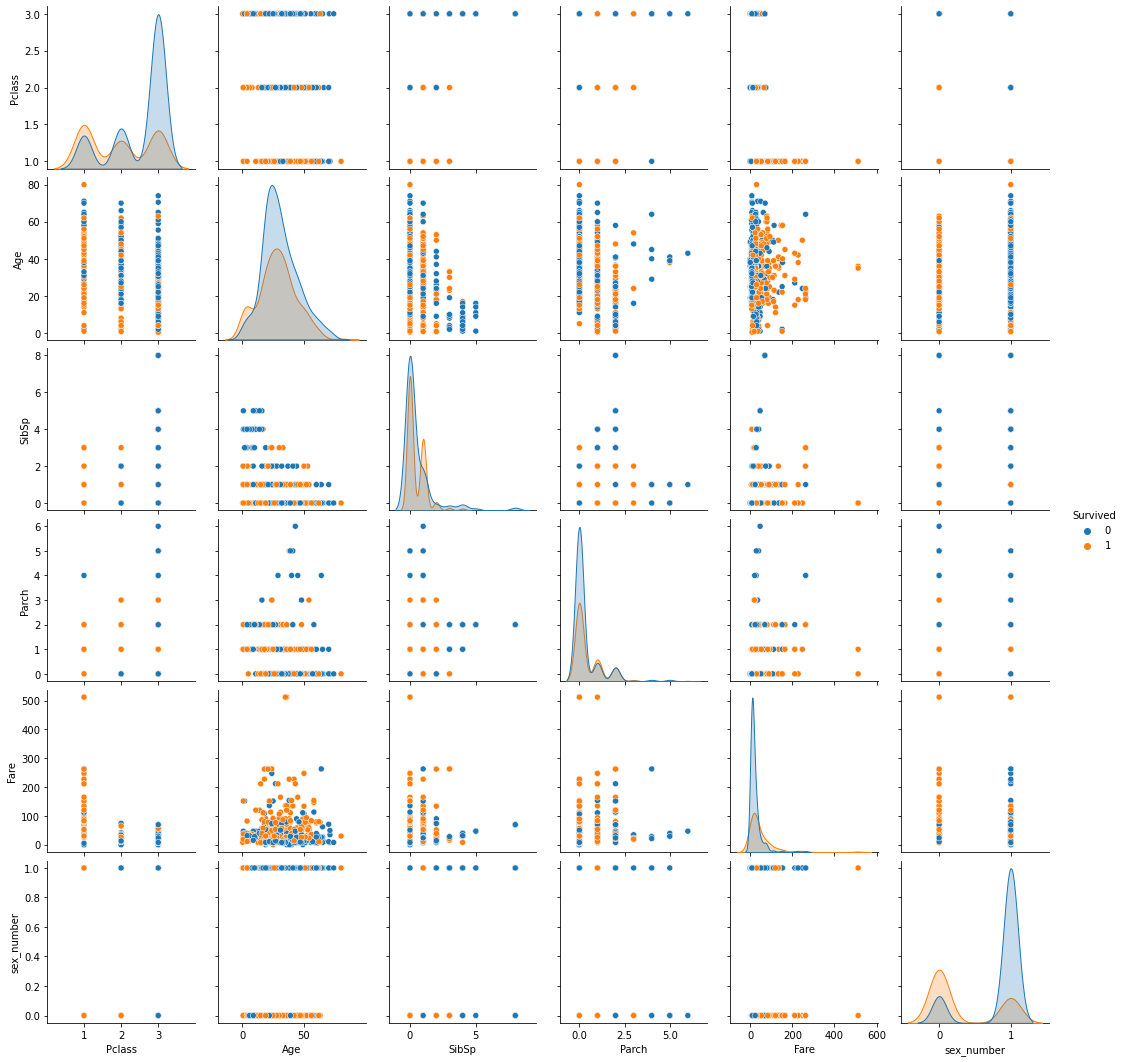

In [14]:
train["sex_number"] = (train["Sex"] == "male").astype(int)
sns.pairplot(train, hue = 'Survived')

Survived ratio
---

In [76]:
Parch_SurvivedRatio = train[["Parch",'Survived']].groupby(['Parch',"Survived"]).agg({'Survived': 'size'})
Parch_SurvivedRatio["%"] = Parch_SurvivedRatio.groupby(level=0).apply(lambda x:  100*x / x.sum())
Parch_SurvivedRatio

Survived           %
Parch Survived                      
0     0              445   65.634218
      1              233   34.365782
1     0               53   44.915254
      1               65   55.084746
2     0               40   50.000000
      1               40   50.000000
3     0                2   40.000000
      1                3   60.000000
4     0                4  100.000000
5     0                4   80.000000
      1                1   20.000000
6     0                1  100.000000

In [77]:
Pclass_SurvivedRatio = train[["Pclass",'Survived']].groupby(['Pclass',"Survived"]).agg({'Survived': 'size'})
Pclass_SurvivedRatio["%"] = Pclass_SurvivedRatio.groupby(level=0).apply(lambda x:  100*x / x.sum())
Pclass_SurvivedRatio

Survived          %
Pclass Survived                     
1      0               80  37.037037
       1              136  62.962963
2      0               97  52.717391
       1               87  47.282609
3      0              372  75.763747
       1              119  24.236253